## Phase 3 Project Submission

* Student name: Nurulain Abdi Maalim

* Student pace: Part time Moringa School

* Scheduled project review date/time: Friday 10th February 2023

* Instructor name: Everlyne Asiko, Asha Deen, Rose Delilah and Noah Kandie

# Pump it Up: Data Mining the Water Table
   <img src='Man Pumping water.png' width=30%/>

##                                    Tanzanian Water wells                   


### Objective
> * Build a machine learning model that accurately predicts well function in Tanzania based on a set of well characteristics.
> * Efforts to maximize model accuracy to support Tanzania's Ministry of Water and improve access to clean water in rural areas.
> * To optimize the model's performance on the task of ternary classification (functional, functional needs repair, non-functional),in order to make accurate predictions about the state of a well.
> * Identify patterns or relationships in your data that can explain why some wells are functioning and some are not, and use that information to inform future well construction and maintenance.
> * We are developing solutions that can be extended and applied to other rural communities facing similar challenges in accessing clean water. 


I am using CRISP-DM Methodology to analyse Tanzanian Water wells

In [1]:
#Importing all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import folium

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Now loading the training set values file to see what we are dealing with
training = pd.read_csv("training set values.csv")

#Now loading the training set labels file to see what we are dealing with
labels = pd.read_csv("training set labels.csv")

#Now loading the testing  set labels file to see what we are dealing with
test = pd.read_csv("Test set values.csv")

In [3]:
#lets see what we have here by checking the first few rows and columns of the datasets
training.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
#Now loading the testing set values file to see what we are dealing with
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,04/02/2013,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,04/02/2013,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,01/02/2013,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,22/01/2013,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,27/03/2013,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
#lets see the features of our dataset 
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

#### 
We have some missing values in some rows, lets keep checking on the other files then we will decide on what to do with the missing Data.

In [7]:
#What's the shape of our training data?
training.shape

(59400, 40)

In [8]:
#Lets see what kind of features we are dealing with in the training labels csv file 
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


### Observation
I should probably merge these two dataframes(Training and labels) because the target variable I am trying to get a hold of and predict is stored in the training set labels.csv file, while the characteristics of the wells are stored in the training set values.csv file. 
Merging the two dataframes into a single dataframe makes it easier to work with the data, since all of the data is in one place.
Now that we are on the same page! lets do this!

In [9]:
# Merging the training set labels and training set values dataframes using the ID column
training_data= pd.merge(training,labels, on="id")
training_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Dealing with Missing Values

In [10]:
#lets see what our data now looks like
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [11]:
#checking for duplicates in our data
training_data.duplicated().sum()

0

In [12]:
#seems like we have a bunch of missing values lets take a look them closely
training_data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [13]:
test.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

> We have the following columns with missing data in both the test and training set:
> * funder
> * installer
> * subvillage
> * public_meeting
> * scheme_management   
> * scheme_name       
> * permit     
>


In [14]:
#dropping some columns that seem to have same data as some other columns
training_data.drop(["date_recorded","wpt_name","num_private","public_meeting",
                    "recorded_by","scheme_name","extraction_type","management","payment",
                    "water_quality","quantity","source","waterpoint_type","subvillage"], axis=1, inplace=True)
test.drop(["date_recorded","wpt_name","num_private","public_meeting",
           "recorded_by","scheme_name","extraction_type","management","payment",
           "water_quality","quantity","source","waterpoint_type","subvillage"], axis=1, inplace=True)

In [15]:
training_data["funder"].sample(30, random_state=1)

50088              Kkkt_makwale
14032                    Hesawa
45629                     Tasaf
55020                       NaN
6407                       Dmdd
44790                    Oxfarm
2862                 World Bank
49818    Government Of Tanzania
22651                      Adra
57157                   Germany
32977    Government Of Tanzania
6655                         Ir
34769                      Cdtf
8419     Government Of Tanzania
24203                    Hesawa
12099                  Wananchi
28743                      Dmdd
8257                     Hesawa
56922                       NaN
19871                World Bank
15049                 Ces(gmbh)
19752            Samweli Kitana
37264    Government Of Tanzania
1336                        Dhv
29829            Gachuma Ginery
41782              World Vision
44225               Netherlands
42136                     Amref
58422                    Danida
36770              World Vision
Name: funder, dtype: object

In [16]:
# replacing the Missing values in funder with Other for both data sets, training and test
training_data["funder"] = training_data["funder"].fillna('other')
test["funder"] = test["funder"].fillna('other')

In [17]:
training_data["installer"].sample(30, random_state=1)

50088    KKKT _ Konde and DWE
14032                  HESAWA
45629                   TASAF
55020                     NaN
6407                     DMDD
44790       Wasso contractors
2862               WORLD BANK
49818                    Gove
22651                    Adra
57157                     DWE
32977                     DWE
6655                       Ir
34769                     DWE
8419                      DWE
24203                  HESAWQ
12099                Wananchi
28743                    Dmdd
8257                      DWE
56922                     NaN
19871           TAN PLANT LTD
15049                     DWE
19752          Samweli Kitana
37264                   Gover
1336                      DWE
29829          GACHUMA GINERY
41782            World vision
44225                     DWE
42136                   Amref
58422                  DANIDA
36770            World vision
Name: installer, dtype: object

In [18]:
# replacing the Missing values in "installer" with unknown for both data sets, training and test
training_data["installer"] = training_data["installer"].fillna('unknown')
test["installer"] = test["installer"].fillna('unknown')

In [19]:
training_data["scheme_management"].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [20]:
# replacing the Missing values in "scheme_management" with "others" for both data sets, training and test
training_data["scheme_management"] = training_data["scheme_management"].fillna("others" )
test["scheme_management"] = test["scheme_management"].fillna("others" )

In [21]:
training_data["permit"].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [22]:
#since "permit" column has true or False I will Fill missing values with the mode
training_data["permit"].fillna(training_data["permit"].mode()[0], inplace=True)

test["permit"].fillna(test["permit"].mode()[0], inplace=True)

In [23]:
#okay now that we are done lets check on our data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   basin                  59400 non-null  object 
 8   region                 59400 non-null  object 
 9   region_code            59400 non-null  int64  
 10  district_code          59400 non-null  int64  
 11  lga                    59400 non-null  object 
 12  ward                   59400 non-null  object 
 13  population             59400 non-null  int64  
 14  scheme_management      59400 non-null  object 
 15  pe

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   funder                 14850 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   installer              14850 non-null  object 
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   basin                  14850 non-null  object 
 8   region                 14850 non-null  object 
 9   region_code            14850 non-null  int64  
 10  district_code          14850 non-null  int64  
 11  lga                    14850 non-null  object 
 12  ward                   14850 non-null  object 
 13  population             14850 non-null  int64  
 14  scheme_management      14850 non-null  object 
 15  pe

## Visualisations

#### 1. Here is a bar chart to show the distribution of functional, functional but needs repair, and non-functional wells.


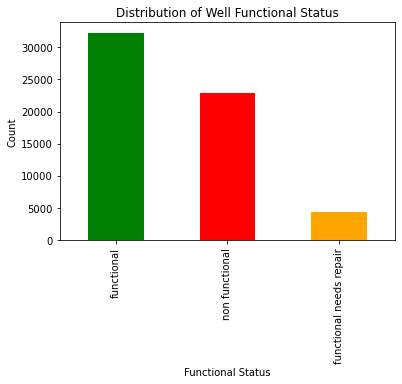

In [25]:
# here is a Distribution of well functional status: 

# Count the number of wells for each functional status
counts = training_data["status_group"].value_counts()

# Plot the distribution of well functional status
counts.plot(kind="bar", color=["green", "red", "orange"])

# Add title and labels to the plot
plt.title("Distribution of Well Functional Status")
plt.xlabel("Functional Status")
plt.ylabel("Count")

# Show the plot
plt.show()


### 3. Well functionality vs well type:
#### Here is  a bar chart to showing the distribution of well types (e.g., communal standpipe, spring, hand pump, etc.) for each functional status category.

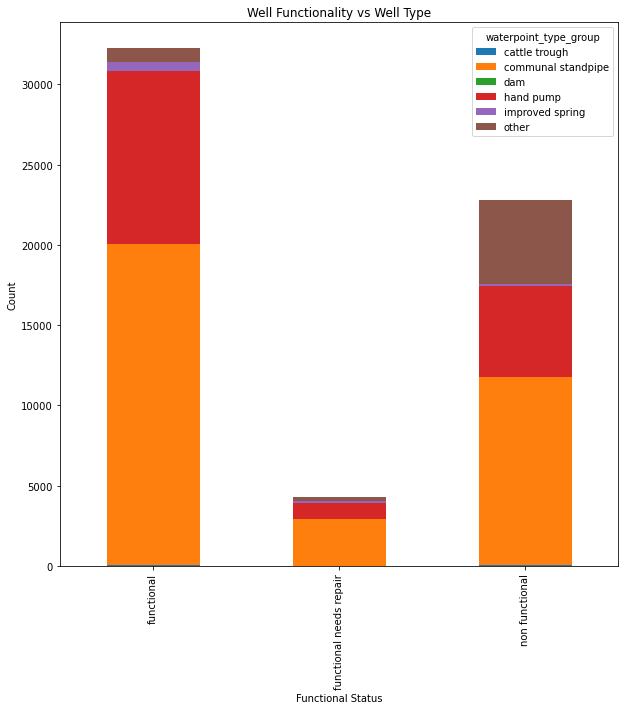

In [27]:
# Pivot the data to show the distribution of well types for each functional status category
pivot = training_data.pivot_table(values='id', index='status_group', columns='waterpoint_type_group', aggfunc='count')

# Plot the pivot table as a bar chart
pivot.plot(kind='bar', stacked=True, figsize=(10,10))

# Add title and labels to the plot
plt.title("Well Functionality vs Well Type")
plt.xlabel("Functional Status")
plt.ylabel("Count")

# Show the plot
plt.show()

#### 4. The distribution of water quality for each functional status category

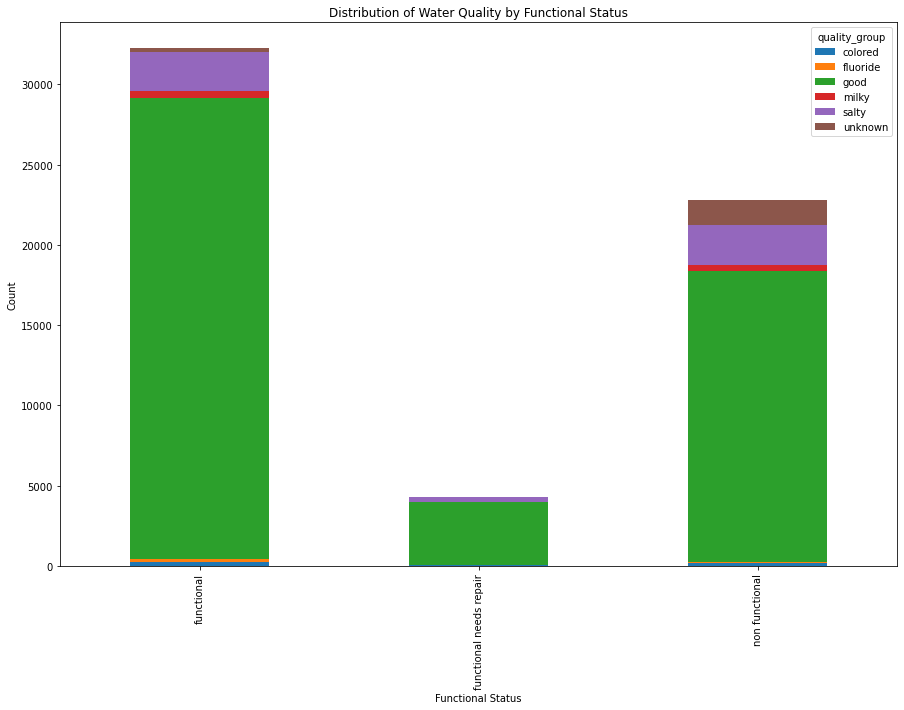

In [28]:
# Pivot the data to show the distribution of water quality for each functional status category
pivot = training_data.pivot_table(values='id', index='status_group', columns='quality_group', aggfunc='count')

# Plot the pivot table as a bar chart
pivot.plot(kind='bar', stacked=True, figsize=(15,10))

# Add labels and title to the plot
plt.xlabel('Functional Status')
plt.ylabel('Count')
plt.title('Distribution of Water Quality by Functional Status')

# Show the plot
plt.show()


#### 5. The number of wells that were functional, functional but needs repair, and non-functional over time

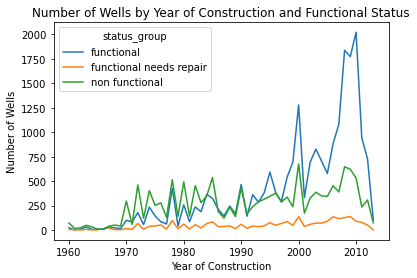

In [29]:
# Filtering out the rows where the year of construction is 0
filtered_data = training_data[training_data.construction_year != 0]

# Grouping the filtered data by year of construction and functional status
grouped = filtered_data.groupby(['construction_year', 'status_group'])['id'].count().reset_index()

# Pivoting the data to make the functional status the columns and the year of construction the index
pivot = grouped.pivot(index='construction_year', columns='status_group', values='id') 

# now we plot the pivot table as a line chart
pivot.plot(kind='line')
plt.title("Number of Wells by Year of Construction and Functional Status")
plt.xlabel("Year of Construction")
plt.ylabel("Number of Wells")
plt.show()

#### 6. Here is a matrix to show the pairwise correlations between different variables in the data (e.g., well type, water quality, year of construction, etc.). This will  help us identify variables that are strongly correlated with well functionality.

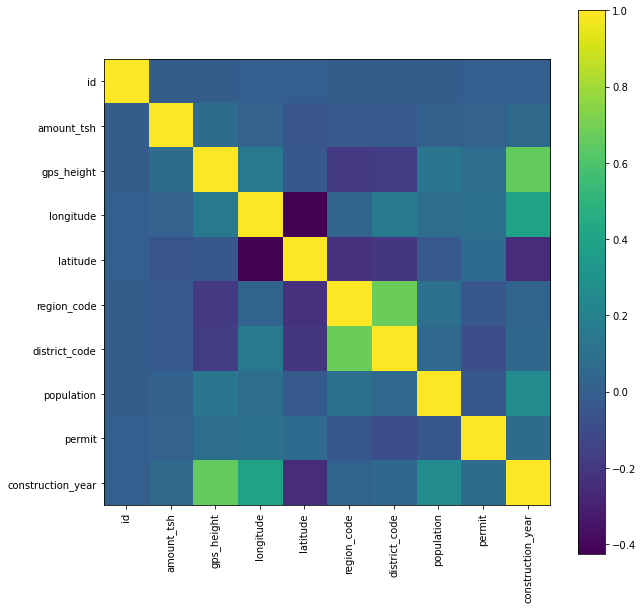

In [30]:
# Calculate the pairwise correlations between the columns
corr_matrix = training_data.corr()

# Plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(corr_matrix)

# Add a colorbar to the plot
cbar = ax.figure.colorbar(im, ax=ax)

# Add labels to the x and y axes
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# Rotate the x tick labels
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [31]:
#lets see how the values are correlated for training_data
training_data.corr()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,permit,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.003028,-0.003044,-0.002813,-0.000070,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,-0.026813,-0.023599,0.016288,0.023026,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,-0.183521,-0.171233,0.135003,0.091959,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.034197,0.151398,0.086590,0.103182,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,-0.221018,-0.201020,-0.022152,0.070615,-0.245278
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,1.000000,0.678602,0.094088,-0.036440,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,0.678602,1.000000,0.061831,-0.081400,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.094088,0.061831,1.000000,-0.036004,0.260910
permit,-0.000070,0.023026,0.091959,0.103182,0.070615,-0.036440,-0.081400,-0.036004,1.000000,0.077197
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.031724,0.048315,0.260910,0.077197,1.000000


In [32]:
#lets check on correlations for test
test.corr()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,permit,construction_year
id,1.000000,-0.016012,0.002711,-0.003331,0.009632,0.002601,-0.000655,-0.016068,-0.008570,-0.004591
amount_tsh,-0.016012,1.000000,0.096230,0.027709,-0.072210,-0.028887,-0.027391,0.028657,0.027985,0.086236
gps_height,0.002711,0.096230,1.000000,0.148722,-0.045028,-0.177832,-0.169586,0.131994,0.096544,0.656781
longitude,-0.003331,0.027709,0.148722,1.000000,-0.430001,0.024354,0.148962,0.090862,0.110420,0.397361
latitude,0.009632,-0.072210,-0.045028,-0.430001,1.000000,-0.203080,-0.196176,-0.024123,0.058497,-0.256610
region_code,0.002601,-0.028887,-0.177832,0.024354,-0.203080,1.000000,0.687910,0.097118,-0.026829,0.029993
district_code,-0.000655,-0.027391,-0.169586,0.148962,-0.196176,0.687910,1.000000,0.066425,-0.077512,0.046214
population,-0.016068,0.028657,0.131994,0.090862,-0.024123,0.097118,0.066425,1.000000,-0.035919,0.272421
permit,-0.008570,0.027985,0.096544,0.110420,0.058497,-0.026829,-0.077512,-0.035919,1.000000,0.087950
construction_year,-0.004591,0.086236,0.656781,0.397361,-0.256610,0.029993,0.046214,0.272421,0.087950,1.000000


> From the observations, it is evident that the values are independent of one another, which is a favorable characteristic for the model.

In [33]:
#status_group_values ={'functional':0, 'functional needs repair':2,'non functional':1}
#training_data['status_group']=training_data.status_group.replace(status_group_values)

## Preprocessing Data 

At this stage I now feel like my data is clean enough for preparing it for analysis, just to make sure our Data is suitable for use with machine learning algorithms.

I will do this by first Transforming some columns such as status_group from categorical to numerical variable using 
label encoding from scikit-learn. 

In [34]:
# Import the LabelEncoder from the sklearn library
from sklearn import preprocessing

# Creating an instance of the LabelEncoder
le = preprocessing.LabelEncoder()

# Fitting and transforming the "status_group" column in the training data
training_data.status_group = le.fit_transform(training_data.status_group)

# checking out the transformed "status_group" column in the training data
training_data.status_group

0        0
1        0
2        0
3        2
4        0
        ..
59395    0
59396    0
59397    0
59398    0
59399    0
Name: status_group, Length: 59400, dtype: int64

## Decision tree

In [35]:
# Encoding categorical variables to numerical values
data = pd.get_dummies(training_data, columns=['funder', 'installer', 'basin', 'region','lga',
                                              'scheme_management', 'permit', 'construction_year',
                                              'ward','extraction_type_group', 'extraction_type_class',
                                              'management_group', 'payment_type', 'quality_group',
                                              'quantity_group', 'source_type', 'source_class',
                                              'waterpoint_type_group'])

# Splitting the data into training and test sets
X = data.drop(['status_group'], axis=1)
y = data['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Make predictions for test data
y_pred = classifier.predict(X_test)

In [36]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

from sklearn.metrics import f1_score

y_true = [0, 1, 1, 0, 1, 1, 1, 0, 0, 1]
y_pred = [0, 1, 1, 0, 0, 0, 1, 1, 0, 1]

f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

Accuracy is :75.17676767676768
F1 Score: 0.7272727272727272


## Interpretation

* The accuracy score is is 75.18% which means that my model is able to correctly predict the status of 75.18% of the wells in the test data.
 
* The F1 Score is 0.73 which means our model is able to achieve a good balance between precision and recall. 

## Random Forest 

* Now that we got some good results on our decision tree lets Move on to a more complex classifier - Random Forest.
* What random Forest does is it combines multiple decision trees to make predictions, reducing the chances of overfitting and increasing accuracy. Excited to see how this performs on our dataset!

In [37]:
# Importing the OrdinalEncoder class from the sklearn.preprocessing module
from sklearn.preprocessing import OrdinalEncoder

# Creating an instance of the encoder
enc = OrdinalEncoder()

# Encode the categorical variables in the training data and store the results back in the dataframe
# The values of the column are reshaped to 2D array with a single column as required by the encoder
training_data.funder = enc.fit_transform(training_data.funder.values.reshape(-1,1))
training_data.installer = enc.fit_transform(training_data.installer.values.reshape(-1,1))
training_data.basin = enc.fit_transform(training_data.basin.values.reshape(-1,1))
training_data.region = enc.fit_transform(training_data.region.values.reshape(-1,1))
training_data.lga = enc.fit_transform(training_data.lga.values.reshape(-1,1))
training_data.ward = enc.fit_transform(training_data.ward.values.reshape(-1,1))
training_data.scheme_management = enc.fit_transform(training_data.scheme_management.values.reshape(-1,1))
training_data.permit = enc.fit_transform(training_data.permit.values.reshape(-1,1))
training_data.extraction_type_group = enc.fit_transform(training_data.extraction_type_group.values.reshape(-1,1))
training_data.extraction_type_class = enc.fit_transform(training_data.extraction_type_class.values.reshape(-1,1))
training_data.management_group = enc.fit_transform(training_data.management_group.values.reshape(-1,1))
training_data.payment_type = enc.fit_transform(training_data.payment_type.values.reshape(-1,1))
training_data.quality_group = enc.fit_transform(training_data.quality_group.values.reshape(-1,1))
training_data.quantity_group = enc.fit_transform(training_data.quantity_group.values.reshape(-1,1))
training_data.source_type = enc.fit_transform(training_data.source_type.values.reshape(-1,1))
training_data.source_class = enc.fit_transform(training_data.source_class.values.reshape(-1,1))
training_data.waterpoint_type_group = enc.fit_transform(training_data.waterpoint_type_group.values.reshape(-1,1))

# Encode the categorical variables in the test data and store the results back in the dataframe
# The values of the column are reshaped to 2D array with a single column as required by the encoder
test.funder = enc.fit_transform(test.funder.values.reshape(-1,1))
test.installer = enc.fit_transform(test.installer.values.reshape(-1,1))
test.basin = enc.fit_transform(test.basin.values.reshape(-1,1))
test.region = enc.fit_transform(test.region.values.reshape(-1,1))
test.lga = enc.fit_transform(test.lga.values.reshape(-1,1))
test.ward = enc.fit_transform(test.ward.values.reshape(-1,1))
test.scheme_management = enc.fit_transform(test.scheme_management.values.reshape(-1,1))
test.permit = enc.fit_transform(test.permit.values.reshape(-1,1))
test.extraction_type_group = enc.fit_transform(test.extraction_type_group.values.reshape(-1,1))
test.extraction_type_class = enc.fit_transform(test.extraction_type_class.values.reshape(-1,1))
test.management_group = enc.fit_transform(test.management_group.values.reshape(-1,1))
test.payment_type = enc.fit_transform(test.payment_type.values.reshape(-1,1))
test.quality_group = enc.fit_transform(test.quality_group.values.reshape(-1,1))
test.quantity_group = enc.fit_transform(test.quantity_group.values.reshape(-1,1))
test.source_type = enc.fit_transform(test.source_type.values.reshape(-1,1))
test.source_class = enc.fit_transform(test.source_class.values.reshape(-1,1))
test.waterpoint_type_group = enc.fit_transform(test.waterpoint_type_group.values.reshape(-1,1))

In [38]:
y = training_data["status_group"]
X = training_data.drop(['id', 'status_group'], axis=1)
X_test = test.drop(['id'], axis=1) 

In [39]:
#split training set for training and testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.10, stratify=y, shuffle=True)
#check shapes of testing data
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((53460, 25), (5940, 25), (53460,), (5940,))

In [40]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the validation set
X_val = scaler.transform(X_val)
# Scale the test set
X_test = scaler.transform(X_test)

In [41]:
# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_val)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8111111111111111


In [42]:
from sklearn.metrics import f1_score

y_true = [0, 1, 1, 0, 1, 1, 1, 0, 0, 1]
y_pred = [0, 1, 1, 0, 0, 0, 1, 1, 0, 1]

f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

F1 Score: 0.7272727272727272


* That F1 score looks good honestly, but lets Use 3-fold cross-validation to generate a baseline score for this model type, so that we have something to compare our tuned model performance to.

In [43]:
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 80.02%


80% from an evaluation of 3-fold cross validation is pretty great.It shows that my random forest classifier is likely a strong model for this problem! lets try tuning the model to see if we can get better results.

In [44]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 80.61%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


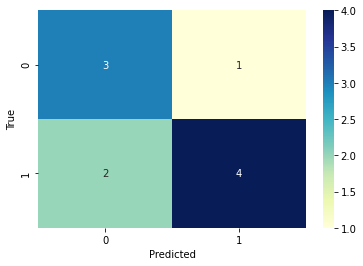

In [46]:
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Based on the accuracy and F1 score, it appears that the Random Forest model has perfomed better than the Decision Tree model. The higher accuracy and F1 score of the Random Forest model suggest that it is better at accurately predicting the classes of instances in our data.

In conclusion, based on my results, it seems that the Random Forest model is the better choice for the data.